## By P.V.Karthikeya,KL University

# Case Study 1:
## Sales Analysis with pandas


#### OBJECTIVE

• What is the overall sales trend?

• Sales by Category?

• Sales by Sub-Category?

• Profit Analysis

• Profit analysis by customer segments:

• Which are the Top 10 products by sales?

• Which are the Most Selling Products?

• Which is the most preferred Ship Mode?

• Which are the Most Profitable Category and Sub-Category?

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

In [146]:
df=pd.read_excel('superstore_sales.xlsx')

In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [9]:
df.shape

(51290, 21)

In [10]:
#checking that is there any missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [12]:
df.describe().round()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.0,3.0,0.0,29.0,26.0,2013.0
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,31.0,2.0,0.0,0.0,3.0,2012.0
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.0,3.0,0.0,9.0,8.0,2013.0
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.0,5.0,0.0,37.0,24.0,2014.0
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.0,14.0,1.0,8400.0,934.0,2014.0
std,NaN,NaN,488.0,2.0,0.0,174.0,57.0,1.0


In [13]:
df['order_date']=pd.to_datetime(df['order_date'])

In [17]:
df['month year']=df['order_date'].dt.strftime('%Y-%m')

In [18]:
df['month year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month year, Length: 51290, dtype: object

In [20]:
df_temp=df.groupby('month year')['sales'].sum().reset_index()

In [21]:
df_temp

,month year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


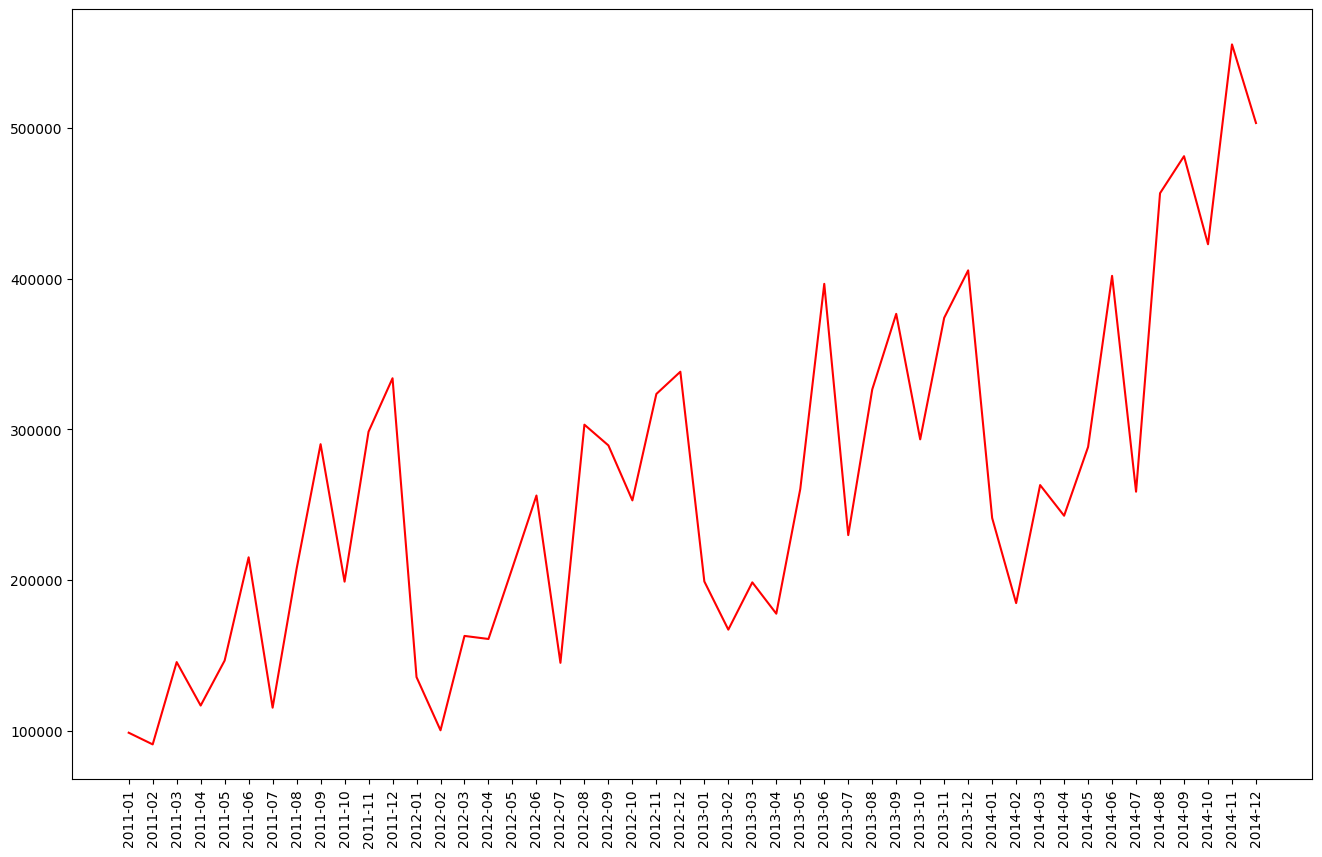

In [28]:
plt.figure(figsize=(16,10))
plt.plot(df_temp['month year'],df_temp['sales'],color='red')
plt.xticks(rotation='vertical',size=10)
plt.show()

## sales by category

In [32]:
sales_by_category=df.groupby('category')['sales'].sum().reset_index()


In [33]:
sales_by_category

,category,sales
0,Furniture,4.110874e+06
1,Office Supplies,3.787070e+06
2,Technology,4.744557e+06


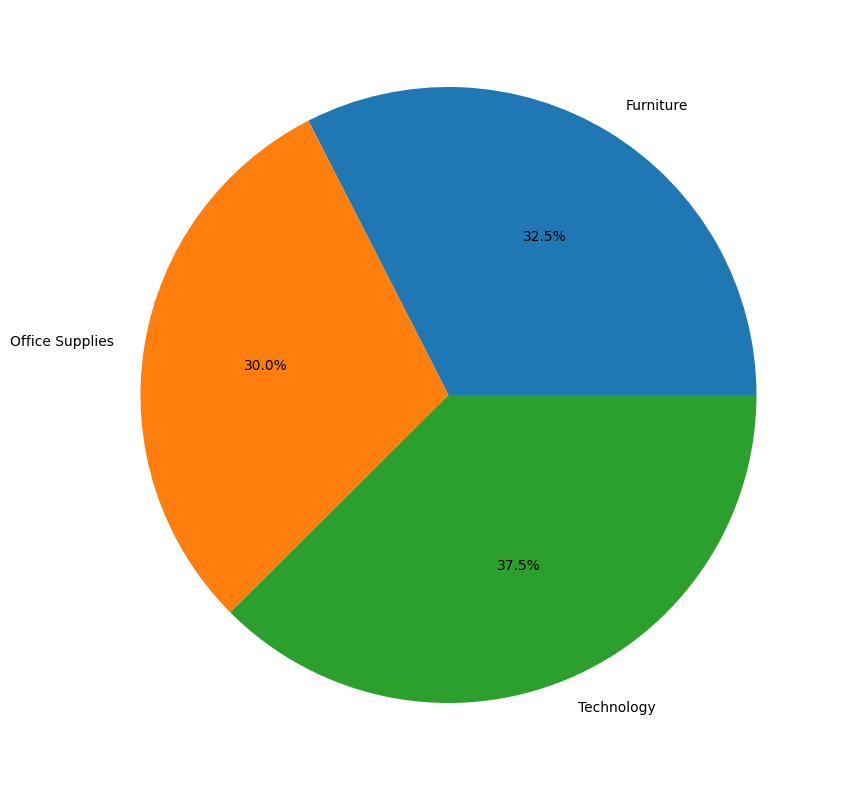

In [42]:
plt.figure(figsize=(20,10))
plt.pie(sales_by_category['sales'],labels=sales_by_category['category'],autopct='%1.1f%%')
plt.show()

In [45]:
sales_by_subcategory=df.groupby('sub_category')['sales'].sum().reset_index()

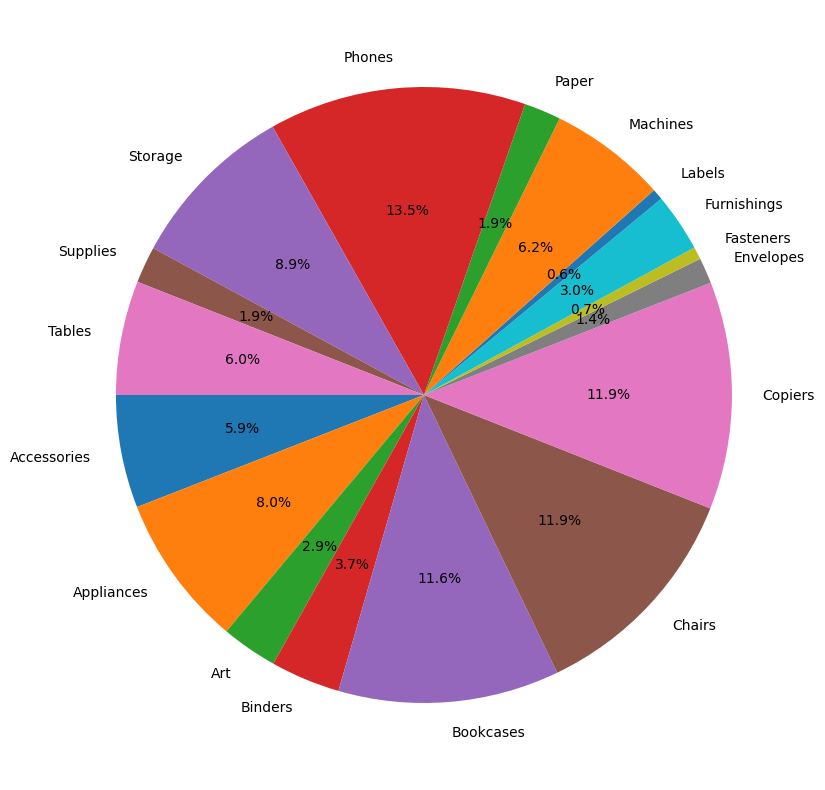

In [48]:
plt.figure(figsize=(20,10))
plt.pie(sales_by_subcategory['sales'],
        labels=sales_by_subcategory['sub_category'],
       autopct='%1.1f%%',startangle=180)
plt.show()

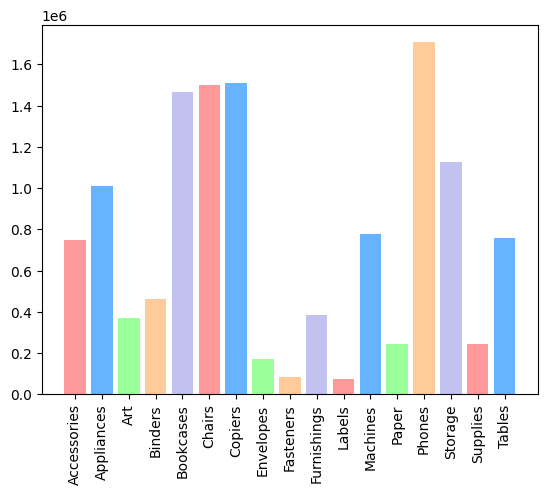

In [86]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.bar(sales_by_subcategory['sub_category'],sales_by_subcategory['sales'],color=colors)
plt.title=('Sales analysis on sub category')
plt.xticks(rotation='vertical')
plt.show()

## Monthly Profits

In [70]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month year'],
      dtype='object')

In [72]:
monthly_profits=df.groupby('month year')['profit'].sum().reset_index()

In [74]:
monthly_profits.head(3)

,month year,profit
0,2011-01,8321.80096
1,2011-02,12417.90698
2,2011-03,15303.56826


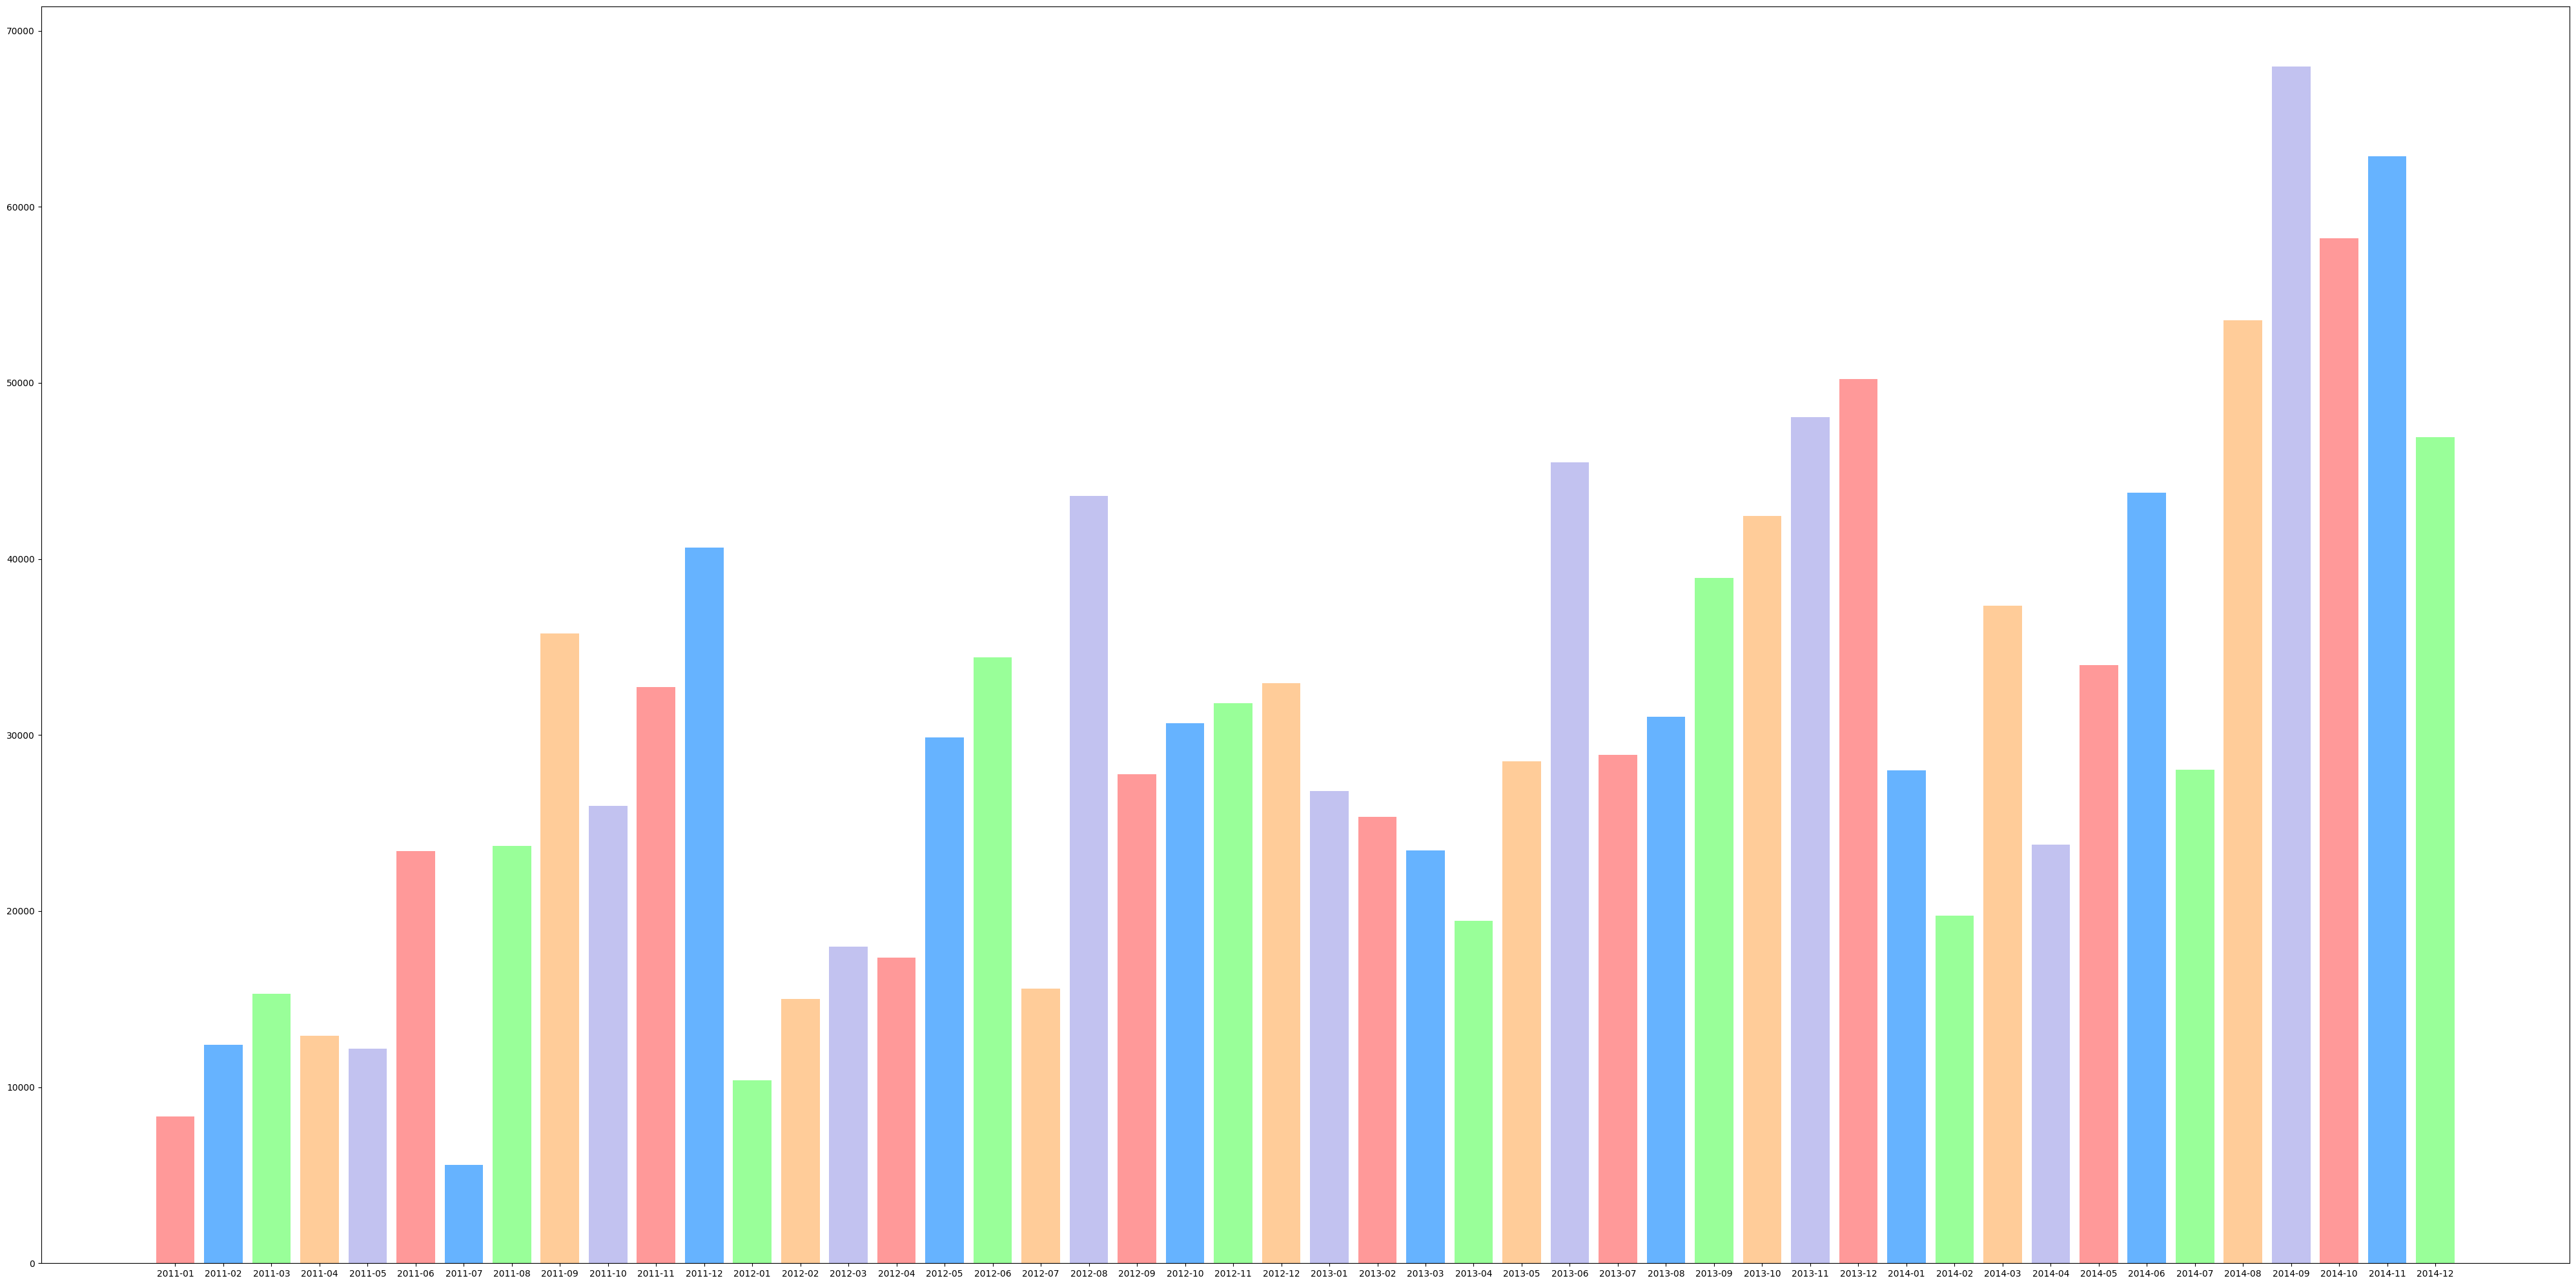

In [87]:
plt.figure(figsize=(40,20))
plt.bar(monthly_profits['month year'],monthly_profits['profit'],color=colors)
plt.tight_layout()

## Profit by Category

In [88]:
profitbycat=df.groupby('category')['profit'].sum().reset_index()

In [89]:
profitbycat

,category,profit
0,Furniture,286782.25380
1,Office Supplies,518473.83430
2,Technology,663778.73318


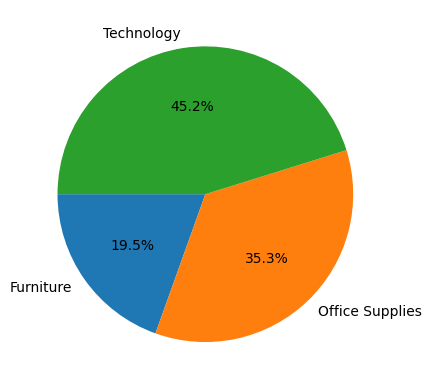

In [111]:
plt.pie(profitbycat['profit'],
        labels=profitbycat['category'],
        autopct='%1.1f%%',shadow=False,startangle=180)
plt.show()

## Profit by sub category

In [96]:
profitbysubcat=df.groupby('sub_category')['profit'].sum().reset_index()

In [97]:
profitbysubcat.head(3)

,sub_category,profit
0,Accessories,129626.3062
1,Appliances,141680.5894
2,Art,57953.9109


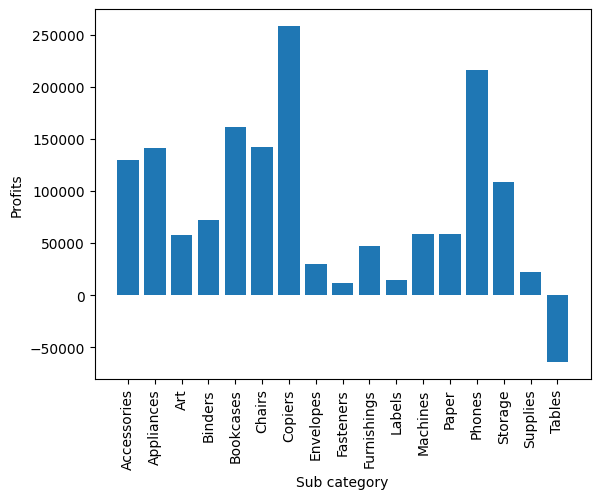

In [155]:
plt.bar(profitbysubcat['sub_category'],
       profitbysubcat['profit'])
plt.xlabel("Sub category")
plt.ylabel("Profits")
plt.xticks(rotation='vertical')
plt.show()

## Profit Analysis 

In [108]:
df['segment'].value_counts()

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

In [103]:
df_profit_by_segment=df.groupby('segment').agg({'sales':'sum','profit':'sum'}).reset_index()

In [104]:
df_profit_by_segment

,segment,sales,profit
0,Consumer,6.507949e+06,749239.78206
1,Corporate,3.824698e+06,442785.85866
2,Home Office,2.309855e+06,277009.18056


## Top 10 product sales

In [116]:
product_sales=pd.DataFrame(df.groupby('product_name')['sales'].sum())

In [117]:
product_sales

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [120]:
product_sales.sort_values(by=['sales'],ascending=False,inplace=True)

In [122]:
##Most selled items
product_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [128]:
best_selling_prod=pd.DataFrame(df.groupby('product_name')['quantity'].sum())
best_selling_prod.sort_values(by=['quantity'],ascending=False,inplace=True)
best_selling_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


## Most prefered ship mode 

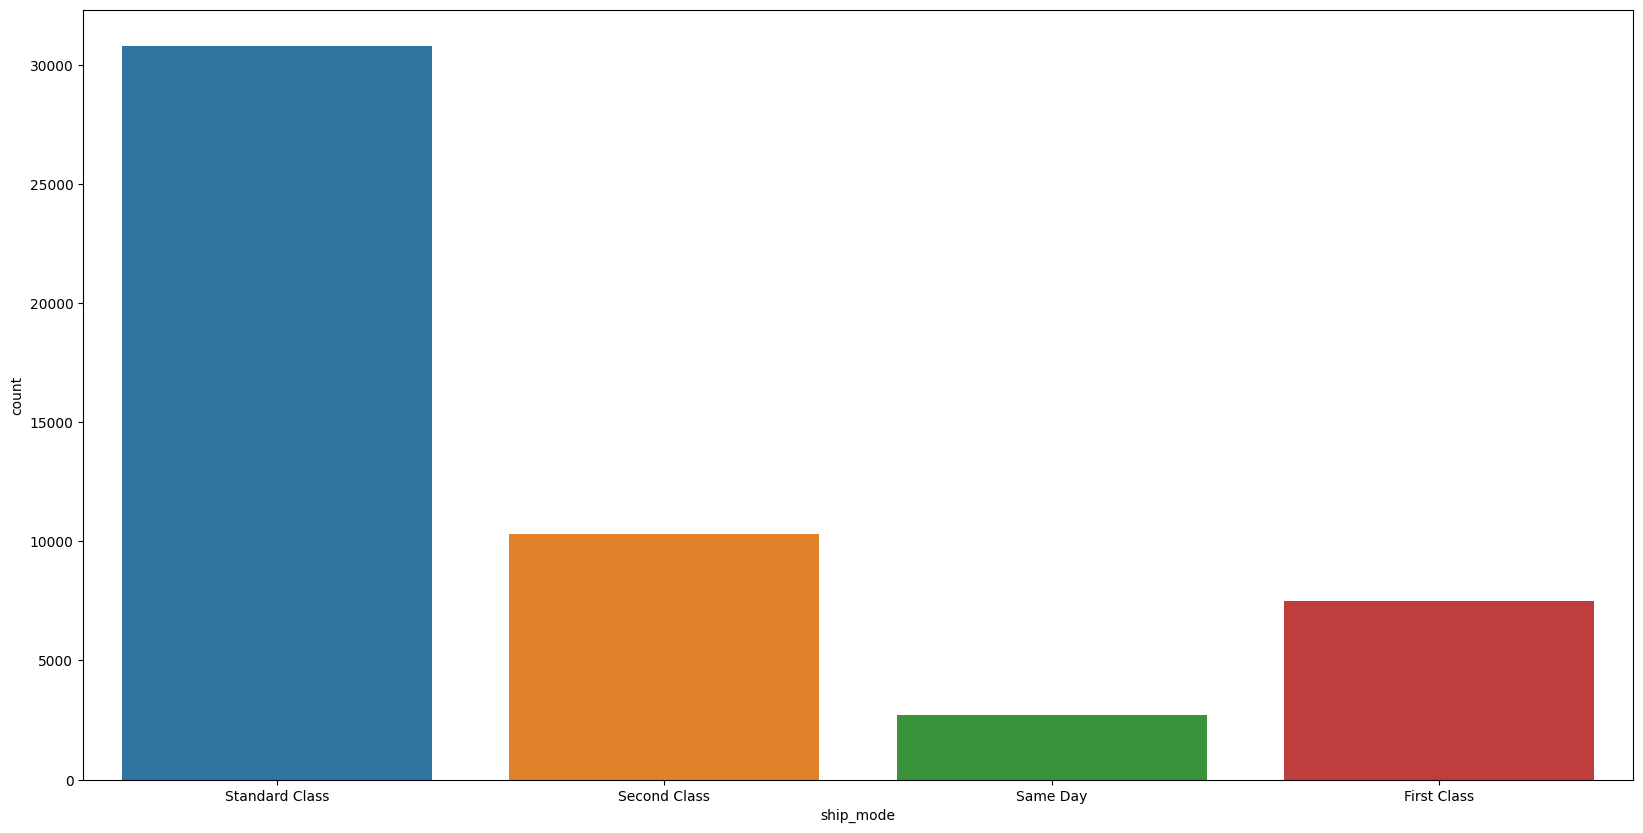

In [148]:
plt.figure(figsize=(20,10))
sns.countplot(x='ship_mode',data=df)
plt.show()

## Most Profitable category and sub category

In [153]:
cat_subcat=pd.DataFrame(df.groupby(['category','sub_category'])['profit'].sum())
cat_subcat.sort_values(['category','sub_category'],ascending=False,inplace=True)
cat_subcat

profit
category        sub_category              
Technology      Phones        216717.00580
                Machines       58867.87300
                Copiers       258567.54818
                Accessories   129626.30620
Office Supplies Supplies       22583.26310
                Storage       108461.48980
                Paper          59207.68270
                Labels         15010.51200
                Fasteners      11525.42410
                Envelopes      29601.11630
                Binders        72449.84600
                Art            57953.91090
                Appliances    141680.58940
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950

## Case Study 2: To analyze and answer business questions about 12 months worth of sales data

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [167]:
all_data.isnull().sum()
all_data.shape

(186850, 6)

In [168]:
nan_df=all_data[all_data.isna().any(axis=1)]

In [169]:
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### Droping null values

In [170]:
all_data=all_data.dropna()
all_data.head()
all_data.shape

(186305, 6)

In [171]:
##Making the all columns in correct type
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [182]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'],errors='coerce')
all_data=all_data.dropna()
all_data['Month']=all_data['Order Date'].dt.month

C:\Users\pabba\AppData\Local\Temp\ipykernel_21184\2018892805.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pabba\AppData\Local\Temp\ipykernel_21184\2018892805.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
all_data['Purchase Address'].value_counts()

Purchase Address
193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
197 Center St, San Francisco, CA 94016    7
727 9th St, San Francisco, CA 94016       7
                                         ..
414 Sunset St, Los Angeles, CA 90001      1
191 Wilson St, Atlanta, GA 30301          1
359 Meadow St, New York City, NY 10001    1
703 Highland St, Dallas, TX 75001         1
220 12th St, San Francisco, CA 94016      1
Name: count, Length: 140787, dtype: int64

In [215]:
## Extyracting city and Address
def get_city(address):
    return address.split(",")[1].strip(" ")
def get_state(address):
    return address.split(",")[2].strip(" ")
all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX 75001),04
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA 02215),04
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA 90001),04
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA 90001),04
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA 90001),04


#### Question 1: What was the best month for sales? How much was earned that month?

In [231]:
all_data['sales']=all_data['Quantity Ordered'].astype('int')*all_data['Price Each'].astype('float')

In [238]:
monthly_sales=all_data.groupby('Month').agg({'Quantity Ordered':'sum','Price Each':'sum','sales':'sum'})

In [239]:
monthly_sales

,Quantity Ordered,Price Each,sales
Month,,,
01,1121411111111111111111111111311112112111111111...,14.9570014.9560011.9915011.9511.9599.9914.9510...,1822256.73
02,1111211111111111111211111112411121111211111111...,7003.84389.9914.953.8414.953.8415011.9511.9599...,2202022.42
03,1111111111111111211211111151211111111131111111...,2.992.9911.9999.99999.9911.9999.99999.9911.953...,2807100.38
04,2111111111111111111111111112111211111112131121...,11.9599.9960011.9911.9911.9599.9911.95170011.9...,3390670.24
05,1111111111211111111111111111111121111111111111...,150149.9970015060011.9515099.9915099.993.84150...,3152606.75
06,1111111111111111111111131111111211111211111111...,11.951700.0999.99149.9999.99150.014.95150.011....,2577802.26
07,1111511111111111211111112112112111111111111121...,1503003.843.842.9999.99600600.011.9514.953.841...,2647775.76
08,2112211111111111111111111111121111131211112111...,11.9999.99700.03.843.8411.99379.99109.9911.991...,2244467.88
09,1111111111114211111111131111111111111121111111...,150379.9914.952.99999.99149.9911.9514.9599.991...,2097560.13


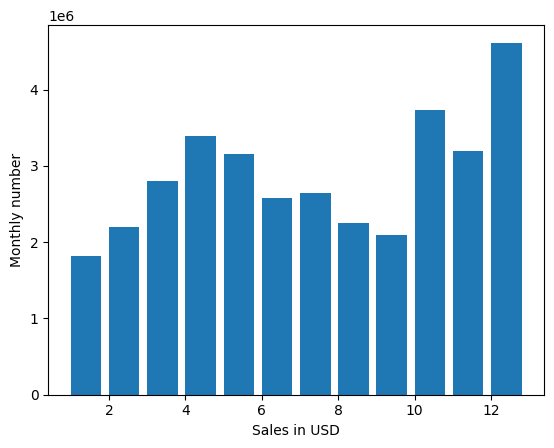

In [246]:
months=range(1,13)
plt.bar(months,all_data.groupby(['Month'])['sales'].sum(),align='edge')
plt.xlabel('Sales in USD')
plt.ylabel('Monthly number')
# plt.title('Monthly Sales')
plt.show()

#### Question 2: What city sold the most product?

In [250]:
city_sales=all_data.groupby('City').agg({'Quantity Ordered':'sum','Price Each':'sum','sales':'sum'})

In [251]:
city_sales

,Quantity Ordered,Price Each,sales
City,,,
Atlanta (GA 30301),1111111111111111111111111111111111111111111111...,11.9514.9599.9914.95149.9911.9914.9511.9911.95...,2795498.58
Austin (TX 73301),1131112111111111311111111111111111111211111211...,1501502.99379.9911.9911.9514.95149.99379.99600...,1819581.75
Boston (MA 02215),1111111211111111111111121111211111111111111111...,99.9911.9915070099.9999.99389.992.9914.9599.99...,3661642.01
Dallas (TX 75001),2111111123111111211111121211111111111121111171...,11.95389.993.8415015014.952.9914.9514.952.9910...,2767975.40
Los Angeles (CA 90001),1111111111311111111111111111111111111111111111...,60011.9911.9960060011.9515011.95149.9911.9511....,5452570.80
New York City (NY 10001),1111121112111121111111111111111121111113112111...,1502.993.8460014.9511.952.99600.06002.9914.951...,4664317.43
Portland (ME 04101),2111111121111111111111111211111111111121211111...,2.9930011.997007006002.99109.9911.95379.9911.9...,449758.27
Portland (OR 97035),2211111111111111211111111111111111111111111111...,2.9914.951503.841700149.99379.9915014.95389.99...,1870732.34
San Francisco (CA 94016),1111211121111111121211111121112121111111111221...,11.95170011.953002.9960011.9911.952.9911.9511....,8262203.91


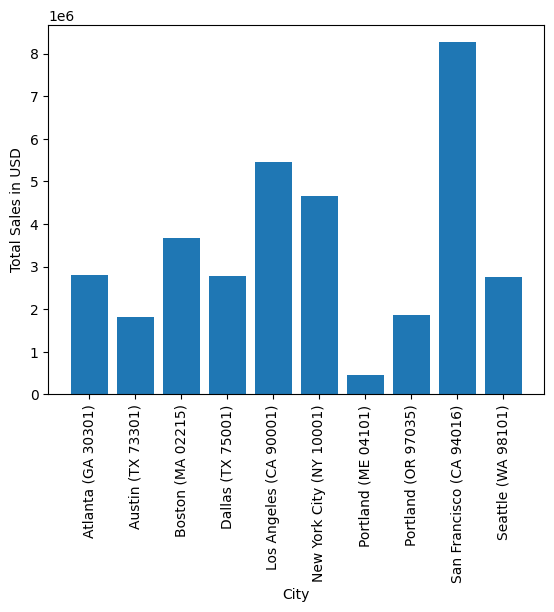

In [258]:
#Monthly sales
city_sales=all_data.groupby('City')['sales'].sum()
plt.bar(city_sales.index,city_sales.values)
plt.xlabel('City')
plt.ylabel('Total Sales in USD')
plt.xticks(rotation='vertical')
plt.show()

####  What time should we display advertisements to maximize likelihood of customer’s buying product?

In [261]:
# Adding hour column
all_data['hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data['minute']=pd.to_datetime(all_data['Order Date']).dt.minute

In [263]:
all_data['count']=1

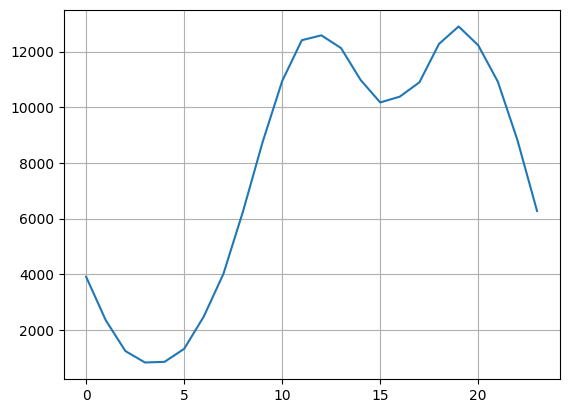

In [274]:
keys=[pair for pair,df in all_data.groupby(['hour'])]   
plt.plot(keys,all_data.groupby(['hour']).count()['count'])
plt.grid()

There are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM). It makes sense
since most people shop during the day. From this data, It can suggest to advertise their product
right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

#### Question 4: What products are most often sold together?

In [278]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [285]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2=df[['Order ID','Grouped']].drop_duplicates()

C:\Users\pabba\AppData\Local\Temp\ipykernel_21184\3314610805.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [288]:
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [295]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df2['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Case Study 3 :

Create a report for an upcoming board meeting. Go through and analyze the sales data from
2015-2017 in order to generate the requested report. The report should capture the following;

• Revenue by region

• Revenue by sales Rep

• Revenue by products

• Sales trend

• Yearly changes in revenue

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('sales-data.csv')
df.head()

,Date,SalesRep,Region,Product,Color,Units,Revenue
0,2015-11-06,Julie,East,Sunshine,Blue,4,78.8
1,2015-11-07,Adam,West,Bellen,Clear,4,123.0
2,2015-11-07,Julie,East,Aspen,Clear,1,26.0
3,2015-11-07,Nabil,South,Quad,Clear,2,69.0
4,2015-11-07,Julie,South,Aspen,Blue,2,51.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9971 non-null   object 
 1   SalesRep  9971 non-null   object 
 2   Region    9971 non-null   object 
 3   Product   9971 non-null   object 
 4   Color     9971 non-null   object 
 5   Units     9971 non-null   int64  
 6   Revenue   9971 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 545.4+ KB


In [5]:
df.describe()

,Units,Revenue
count,9971.000000,9971.000000
mean,3.388828,91.181513
std,4.320759,120.894473
min,1.000000,21.000000
25%,2.000000,42.900000
50%,2.000000,60.000000
75%,3.000000,76.500000
max,25.000000,1901.750000


There was a total of 9,971 sales entries between 2015-2017 Units:

• The minimum number of units sold between 2015-2017 was 1

• The maximum number of units sold between 2015-2017 was 25

• The average number of units sold between 2015-2017 was       aproximately 3

Revenue:

• The least revenue generated between 2015-2017 was 21

• The most revenue between 2015-2017 was approximately 1902

In [7]:
##cheking null values
df.isnull().any()

Date        False
SalesRep    False
Region      False
Product     False
Color       False
Units       False
Revenue     False
dtype: bool

<Axes: >

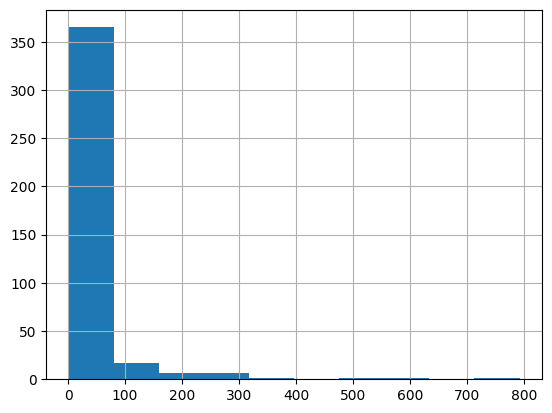

In [11]:
df['Revenue'].value_counts().hist(bins=10)

#### What’s the total revenue generated between 2015-2017?

In [12]:
df['Revenue'].sum()

909170.8700000001

#### Revenue by region 

In [14]:
region_revenue=pd.DataFrame(df.groupby(df['Region'])['Revenue'].sum())
##sorting the revenue data
region_revenue.sort_values(ascending=False,by='Revenue')

,Revenue
Region,
West,408037.58
South,263256.50
East,237876.79


<Axes: xlabel='Region'>

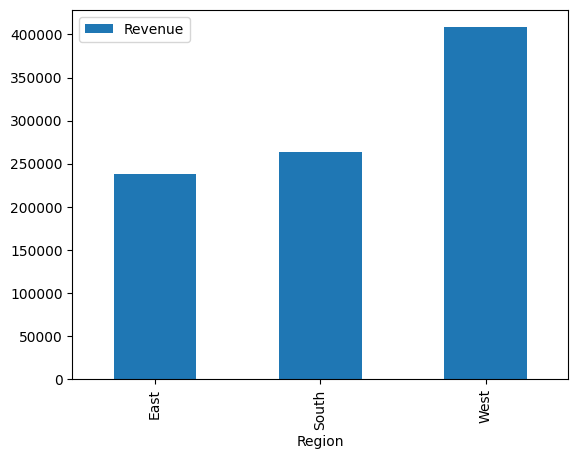

In [15]:
region_revenue.plot(kind='bar')

#### Revenue by sales Rep

In [19]:
rev_by_sales=pd.DataFrame(df.groupby('SalesRep')['Revenue'].sum())
rev_by_sales.sort_values(by='Revenue',ascending=False)

,Revenue
SalesRep,
Mike,205577.78
Julie,204450.05
Nabil,158904.48
Jessica,145496.28
Adam,102715.60
Nicole,92026.68


<Axes: xlabel='SalesRep'>

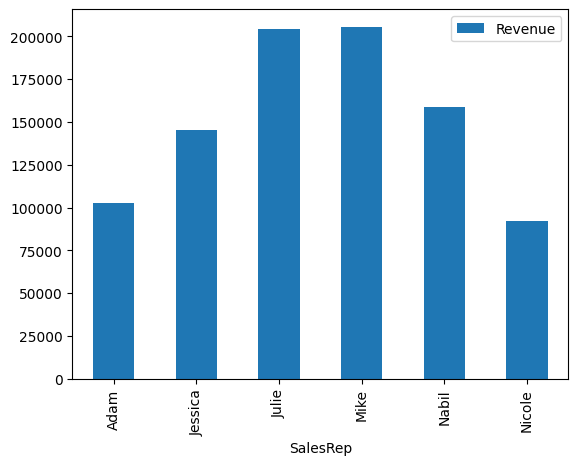

In [23]:
rev_by_sales.plot(kind='bar')

#### Revenue by Products

In [28]:
product_rev=df[['Units','Revenue','Product']].groupby('Product').sum()

In [32]:
product_rev.sort_values(by='Units',ascending=False)

,Units,Revenue
Product,,
Bellen,6579,168175.05
Quad,6223,194032.15
Sunbell,4500,114283.09
Carlota,4371,101272.05
Aspen,4242,96382.80
Sunshine,4229,85983.80
Doublers,3646,149041.93


<Axes: xlabel='Product'>

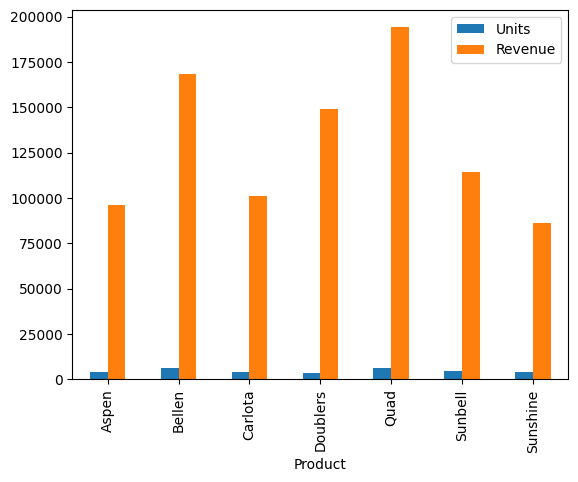

In [33]:
product_rev.plot(kind='bar')

Quad has highest revenue

#### Sales Trend

In [34]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [37]:
df.year.unique()

array([2015, 2016, 2017])

#### Ploting year trends

In [46]:
def plotingtrend(years:list,df):
    for year in years:
        new_df=df[df['year']==year]
        new_df.groupby('Date')['Revenue'].sum().plot(linewidth=1.2)

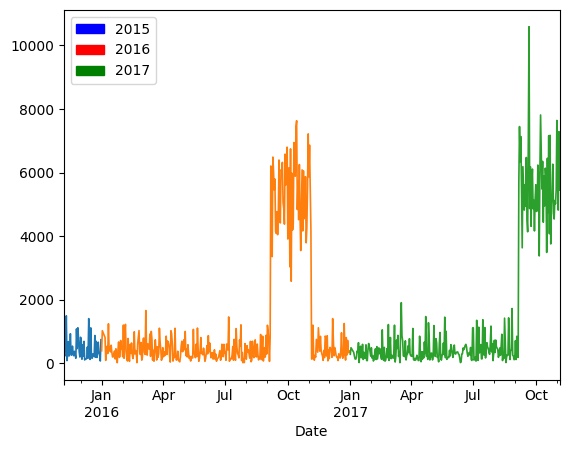

In [48]:
import matplotlib.patches as pt
year1=pt.Patch(color='blue',label='2015')
year2=pt.Patch(color='red',label='2016')
year3=pt.Patch(color='Green',label='2017')
plotingtrend(years,df)
plt.legend(handles=[year1,year2,year3],loc=2)

#### Monthly Sales Trends

<Axes: xlabel='month'>

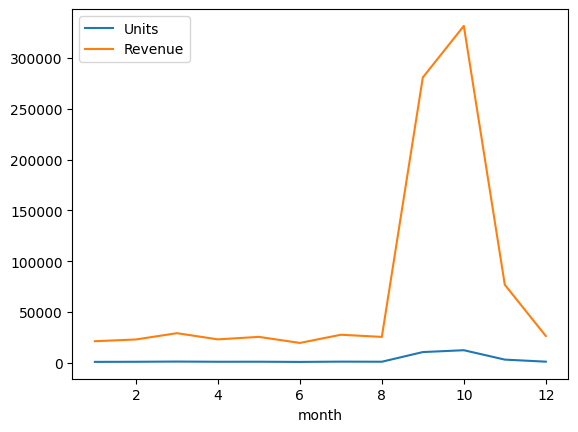

In [54]:
ax=df[['month','Units','Revenue']].groupby('month').sum()
ax.plot()

#### How many times was entry made in each month?

<Axes: xlabel='Month', ylabel='Number of entries'>

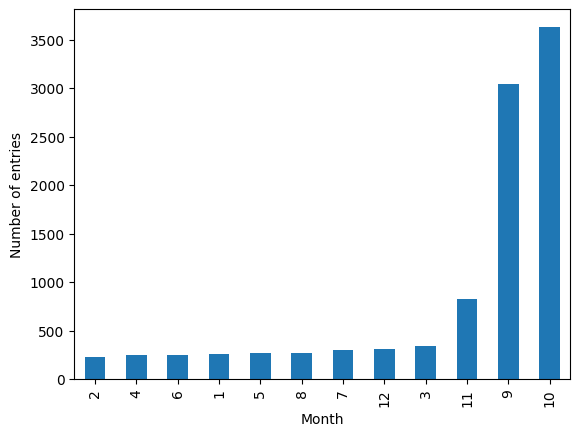

In [60]:
month_entry=df['month'].value_counts().sort_values()
month_entry.plot(kind='bar',xlabel='Month',ylabel='Number of entries')

#### Monthly Sales

In [94]:
products=pd.DataFrame(df[['Units','Revenue','Product','month','Region']].groupby('month')['Product'].value_counts())

In [95]:
products

count
month Product        
1     Bellen       52
      Quad         46
      Sunbell      34
      Aspen        33
      Sunshine     33
...               ...
12    Sunbell      43
      Aspen        41
      Sunshine     36
      Carlota      35
      Doublers     32

[84 rows x 1 columns]

In [96]:
products['number of products']=products['count']
products=products.reset_index()

In [97]:
products.drop('count',inplace=True,axis=1)
products

,month,Product,number of products
0,1,Bellen,52
1,1,Quad,46
2,1,Sunbell,34
3,1,Aspen,33
4,1,Sunshine,33
...,...,...,...
79,12,Sunbell,43
80,12,Aspen,41
81,12,Sunshine,36
82,12,Carlota,35


In [98]:
products=products.pivot_table(values=['number of products'],index=['month'],columns=['Product'],aggfunc=np.sum)

C:\Users\pabba\AppData\Local\Temp\ipykernel_15088\2649347101.py:1: FutureWarning: The provided callable <function sum at 0x000001F00C8E7420> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  products=products.pivot_table(values=['number of products'],index=['month'],columns=['Product'],aggfunc=np.sum)


In [99]:
products

number of products                                              
Product              Aspen Bellen Carlota Doublers Quad Sunbell Sunshine
month                                                                   
1                       33     52      30       29   46      34       33
2                       26     45      29       25   45      35       26
3                       49     55      46       34   77      35       39
4                       31     37      35       27   50      43       25
5                       33     52      36       30   51      37       31
6                       37     53      23       21   52      30       36
7                       38     60      37       25   55      46       42
8                       34     54      26       35   51      35       35
9                      380    596     399      311  560     397      404
10                     476    735     439      333  697     491      460
11                     119    154     118       77  142     108      103
12                      41     55      35       32   64      43       36

<Axes: xlabel='month', ylabel='No of Products sold'>

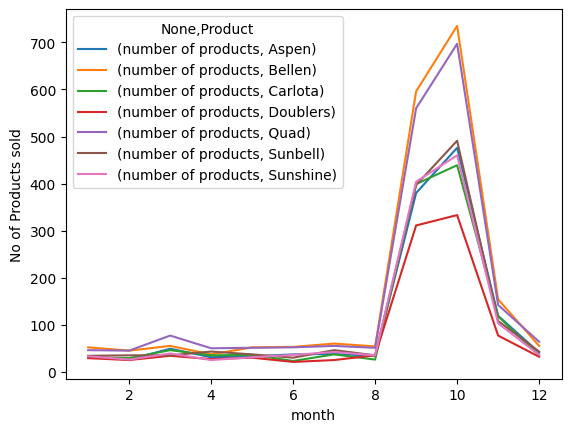

In [100]:
products.plot(ylabel='No of Products sold')


#### Region Revenue

In [114]:
region_sales=pd.DataFrame(df[['Units','Revenue','Product','Region','month']]).groupby(['month','Region'])['Revenue'].sum()

In [115]:
region_sales=pd.DataFrame(region_sales)
region_sales

Revenue
month Region           
1     East      5012.34
      South     7551.55
      West      8550.33
2     East      6428.75
      South     5540.10
      West     10864.87
3     East      6082.75
      South     8863.80
      West     14087.99
4     East      6420.63
      South     7647.28
      West      8865.57
5     East      8782.68
      South     5651.30
      West     10962.00
6     East      6442.85
      South     3954.90
      West      9020.65
7     East      7180.45
      South    10155.59
      West     10150.25
8     East      6031.55
      South     7767.60
      West     11567.37
9     East     70532.44
      South    83228.39
      West    127160.06
10    East     87858.60
      South    92034.70
      West    151780.43
11    East     19478.10
      South    24048.59
      West     33196.52
12    East      7625.65
      South     6812.70
      West     11831.54

In [116]:
region_sales=region_sales.reset_index()
region_sales=region_sales.pivot_table(values=['Revenue'],index=['month'],columns=['Region'],aggfunc=np.sum)


C:\Users\pabba\AppData\Local\Temp\ipykernel_15088\3398456180.py:2: FutureWarning: The provided callable <function sum at 0x000001F00C8E7420> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  region_sales=region_sales.pivot_table(values=['Revenue'],index=['month'],columns=['Region'],aggfunc=np.sum)


In [117]:
region_sales

Revenue                     
Region      East     South       West
month                                
1        5012.34   7551.55    8550.33
2        6428.75   5540.10   10864.87
3        6082.75   8863.80   14087.99
4        6420.63   7647.28    8865.57
5        8782.68   5651.30   10962.00
6        6442.85   3954.90    9020.65
7        7180.45  10155.59   10150.25
8        6031.55   7767.60   11567.37
9       70532.44  83228.39  127160.06
10      87858.60  92034.70  151780.43
11      19478.10  24048.59   33196.52
12       7625.65   6812.70   11831.54

<Axes: xlabel='month', ylabel='revenue'>

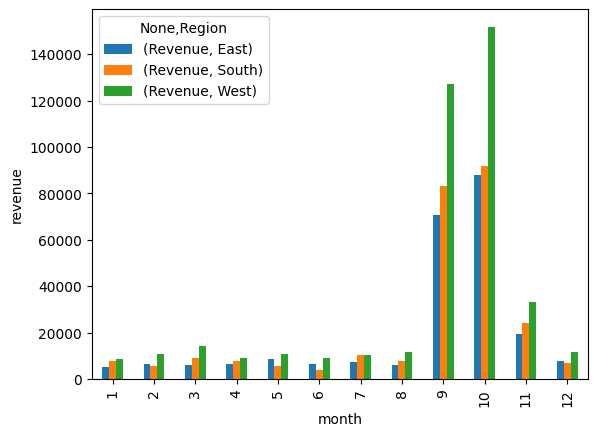

In [118]:
region_sales.plot(kind='bar',xlabel='month',ylabel='revenue')

#### Top 3 products 

In [125]:
product_rev.sort_values(by='Revenue',ascending=False)

,Units,Revenue
Product,,
Quad,6223,194032.15
Bellen,6579,168175.05
Doublers,3646,149041.93
Sunbell,4500,114283.09
Carlota,4371,101272.05
Aspen,4242,96382.80
Sunshine,4229,85983.80


#### The most productive sales Rep in the respective years. 